In [1]:
#import module
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# get filepath 
filename1 = "C:/Users/omasan.akperi/Downloads/edegbai_data/nkporo.xlsx"
filename2 = "C:/Users/omasan.akperi/Downloads/edegbai_data/mamu.xlsx"
filename3 = "C:/Users/omasan.akperi/Downloads/edegbai_data/ajali.xlsx"
filename4 = "C:/Users/omasan.akperi/Downloads/edegbai_data/patti.xlsx"

In [3]:
# get the names of sheets in the excel file
print(pd.ExcelFile(filename1).sheet_names)
print(pd.ExcelFile(filename2).sheet_names)
print(pd.ExcelFile(filename3).sheet_names)
print(pd.ExcelFile(filename4).sheet_names)

['Nzam', 'Amansiodo', 'Akukwa-II', 'Idah']
['Nzam', 'Idah', 'Owan', 'Amansiodo', 'Uzebba Outcrop', 'Okpekpe outcrop', 'Imiegba Outcrop']
['Nzam', 'Owan', 'Idah', 'Amansiodo']
['Ojo et al., 2016', 'Okunlola and Idowu, 2012', 'Nton and adamolekun, 2016']


In [4]:
# combine all sheets in ajali excel file and output an excel file and a df
writer = pd.ExcelWriter("combined.xlsx",engine="xlsxwriter")
combined_a = pd.DataFrame()
combined_b = pd.DataFrame()
combined_c = pd.DataFrame()
combined_d = pd.DataFrame()

for sht in pd.ExcelFile(filename1).sheet_names:
    df = pd.read_excel(filename1, sheet_name =sht)
    combined_a = pd.concat([combined_a, df])
    
for sht in pd.ExcelFile(filename2).sheet_names:
    df = pd.read_excel(filename2, sheet_name =sht)
    combined_b = pd.concat([combined_b, df])
    
for sht in pd.ExcelFile(filename3).sheet_names:
    df = pd.read_excel(filename3, sheet_name =sht)
    combined_c = pd.concat([combined_c, df])
    
for sht in pd.ExcelFile(filename4).sheet_names:
    df = pd.read_excel(filename4, sheet_name =sht)
    combined_d = pd.concat([combined_d, df])
    
#combined.to_excel(writer, sheet_name="ajali", index=False)
#writer.save()

In [5]:
# make a copy of ajali combined sheets
df_nkporo = combined_a.copy()
df_mamu = combined_b.copy()
df_ajali = combined_c.copy()
df_patti = combined_d.copy()

In [6]:
# Select only interesting variables
df_nkporo = df_nkporo[["Analyte Symbol","Al","Ba","Be","Ca","Ce","Co","Cr","Cu","Cs","Fe","Hf","K","La","Na","Nb","Ni","P","Rb","Pb","Mg","Mn","Mo","Sb","Sc","Sn","Sr","Ta","Th","Ti","Tl","U","V","W","Y","Zn","Zr","CaO", "Al2O3", "Na2O","K2O","Fe2O3","MnO","MgO"]]
df_mamu = df_mamu[["Analyte Symbol","Al","Ba","Be","Ca","Ce","Co","Cr","Cu","Cs","Fe","Hf","K","La","Na","Nb","Ni","P","Rb","Pb","Mg","Mn","Mo","Sb","Sc","Sn","Sr","Ta","Th","Ti","Tl","U","V","W","Y","Zn","Zr","CaO", "Al2O3", "Na2O","K2O","Fe2O3","MnO","MgO"]]
df_ajali = df_ajali[["Analyte Symbol","Al","Ba","Be","Ca","Ce","Co","Cr","Cu","Cs","Fe","Hf","K","La","Na","Nb","Ni","P","Rb","Pb","Mg","Mn","Mo","Sb","Sc","Sn","Sr","Ta","Th","Ti","Tl","U","V","W","Y","Zn","Zr","CaO", "Al2O3", "Na2O","K2O","Fe2O3","MnO","MgO"]]
df_patti = df_patti[["Analyte Symbol","Al","Ba","Be","Ca","Ce","Co","Cr","Cu","Cs","Fe","Hf","K","La","Na","Nb","Ni","P","Rb","Pb","Mg","Mn","Mo","Sb","Sc","Sn","Sr","Ta","Th","Ti","Tl","U","V","W","Y","Zn","Zr","CaO", "Al2O3", "Na2O","K2O","Fe2O3","MnO","MgO"]]

In [7]:
df_mamu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 23
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Analyte Symbol  109 non-null    object 
 1   Al              109 non-null    float64
 2   Ba              109 non-null    float64
 3   Be              109 non-null    object 
 4   Ca              109 non-null    object 
 5   Ce              109 non-null    float64
 6   Co              109 non-null    float64
 7   Cr              109 non-null    float64
 8   Cu              109 non-null    float64
 9   Cs              45 non-null     object 
 10  Fe              109 non-null    float64
 11  Hf              109 non-null    float64
 12  K               109 non-null    float64
 13  La              109 non-null    float64
 14  Na              109 non-null    float64
 15  Nb              109 non-null    float64
 16  Ni              109 non-null    float64
 17  P               109 non-null    floa

In [8]:
# clean out non-numeric data
#df_ajali = df_ajali.replace(['< 100', '< 0.1', '< 1', '< 0.05', '> 200', '< 0.01'
#], ['60', '0.06', '0.6', '0.025', '201', '0.006'])

#df_patti = df_patti.replace(['< 100', '< 0.1', '< 1', '< 0.05', '> 200', '< 0.01'], ['60', '0.06', '0.6', '0.025', '201', '0.006'])

dffs = [df_nkporo, df_ajali, df_patti, df_mamu]
for d in dffs:
    d.replace(['< 100', '< 0.1', '< 1', '< 0.05', '> 200', '< 0.01', '> 20.0', '<20', '<1.0', '-', '<0.01', '<0.1'], ['60', '0.06', '0.6', '0.025', '201', '0.006', '21', '16', '0.6', '0', '0.006', '0.06'], inplace=True)

In [9]:
df_nkporo

,Analyte Symbol,Al,Ba,Be,Ca,Ce,Co,Cr,Cu,Cs,...,Y,Zn,Zr,CaO,Al2O3,Na2O,K2O,Fe2O3,MnO,MgO
0,nkp_nzam,9.12,504,3,0.36,92,20.0,102,23.0,3.5,...,22.3,97,126.0,0.503708,17.231932,0.846521,1.216633,7.120083,0.042223,0.729564
1,nkp_nzam,10,357,3,0.66,101,24.4,89,24.1,3.3,...,25.5,161,134.0,0.923464,18.894662,0.746772,1.180495,9.950960,0.060429,0.978279
2,nkp_nzam,7.7,707,3,0.94,90,20.0,104,25.1,3.9,...,23.4,155,109.0,1.315237,14.548890,0.792602,1.192541,8.892956,0.029053,1.624938
3,nkp_nzam,10.9,604,3,0.54,101,23.3,91,23.4,3.6,...,24.6,127,133.0,0.755562,20.595182,0.861349,1.228679,8.306764,0.054877,1.044603
4,nkp_nzam,21,1380,3,0.46,138,39.0,66,21.5,4.8,...,27.6,43,115.0,0.643627,NaN,0.837085,1.409367,4.803912,0.090256,0.630078
5,nkp_nzam,6.74,434,3,0.56,91,23.4,112,25.4,4.6,...,20.9,189,117.0,0.783546,12.735002,0.880220,1.457550,8.235277,0.034863,1.243575
6,nkp_nzam,11.1,164,3,0.42,94,23.4,105,23.6,4.5,...,20.2,89,119.0,0.587659,20.973075,0.930095,1.565963,7.334544,0.067918,1.077765
7,nkp_nzam,10.4,967,3,0.32,95,19.4,110,24.6,4.6,...,22.8,85,114.0,0.447740,19.650449,1.064891,1.698468,6.362324,0.056685,1.094346
8,nkp_nzam,9.81,1080,3,0.35,90,19.5,89,39.1,4.4,...,21.8,93,95.5,0.489716,18.535664,0.994797,1.590055,7.806357,0.100974,1.359642
9,nkp_nzam,9.52,755,3,0.60,79,16.9,93,19.6,4.1,...,18.2,161,120.0,0.839513,17.987718,0.920659,1.481642,6.104971,0.057847,1.293318


In [10]:
dfs = [df_nkporo, df_ajali, df_patti]

for d in dfs:
    d.dropna(how='any',axis=1, inplace=True)

In [11]:
df_mamu.dropna(how='any',axis=0, inplace=True)

In [12]:
df_ajali = df_ajali[['Analyte Symbol', 'Al', 'Ca', 'Ce', 'Co', 'Cu', 'Fe', 'K', 'La', 'Nb',
       'Ni', 'Pb', 'Mg', 'Th', 'Ti', 'U', 'V', 'Zn', 'Zr', 'K2O',
       'Fe2O3']]


In [13]:
df_patti = df_patti[['Analyte Symbol', 'Al', 'Ca', 'Ce', 'Co', 'Cu', 'Fe', 'K', 'La', 'Nb',
       'Ni', 'Pb', 'Mg', 'Th', 'Ti', 'U', 'V', 'Zn', 'Zr', 'K2O',
       'Fe2O3']]


In [14]:
df_nkporo = df_nkporo[['Analyte Symbol', 'Al', 'Ca', 'Ce', 'Co', 'Cu', 'Fe', 'K', 'La', 'Nb',
       'Ni', 'Pb', 'Mg', 'Th', 'Ti', 'U', 'V', 'Zn', 'Zr', 'K2O',
       'Fe2O3']]

In [15]:
df_mamu = df_mamu[['Analyte Symbol', 'Al', 'Ca', 'Ce', 'Co', 'Cu', 'Fe', 'K', 'La', 'Nb',
       'Ni', 'Pb', 'Mg', 'Th', 'Ti', 'U', 'V', 'Zn', 'Zr', 'K2O',
       'Fe2O3']]

In [16]:
# Get all the columns
df_patti.columns

Index(['Analyte Symbol', 'Al', 'Ca', 'Ce', 'Co', 'Cu', 'Fe', 'K', 'La', 'Nb',
       'Ni', 'Pb', 'Mg', 'Th', 'Ti', 'U', 'V', 'Zn', 'Zr', 'K2O', 'Fe2O3'],
      dtype='object')

In [17]:
# convert all non-numeric to numeric data
convert_dict = {'Al': float, 'Ca':float,'Ce':float, 'Co':float,'Cu':float, 'Fe':float, 'K':float, 'La':float, 
                'Nb':float,'Ni':float, 'Pb':float, 'Mg':float, 'Th':float, 'Ti':float, 'U':float, 'V':float, 
                'Zn':float, 'Zr':float,'K2O':float,'Fe2O3':float}

df_ajali = df_ajali.astype(convert_dict)
df_nkporo = df_nkporo.astype(convert_dict)
df_patti = df_patti.astype(convert_dict)

In [18]:
comb_df = pd.concat([df_nkporo, df_patti, df_ajali, df_mamu])

In [19]:
comb_df.replace([np.nan],[0.23089510489510504], inplace=True)

In [20]:
comb_df = comb_df.astype(convert_dict)

In [21]:
comb_df.head()

,Analyte Symbol,Al,Ca,Ce,Co,Cu,Fe,K,La,Nb,...,Pb,Mg,Th,Ti,U,V,Zn,Zr,K2O,Fe2O3
0,nkp_nzam,9.12,0.36,92.0,20.0,23.0,4.98,1.01,42.0,22.0,...,29.7,0.44,14.7,0.700,2.4,154.0,97.0,126.0,1.216633,7.120083
1,nkp_nzam,10.00,0.66,101.0,24.4,24.1,6.96,0.98,46.1,19.7,...,35.4,0.59,14.6,0.649,2.7,164.0,161.0,134.0,1.180495,9.950960
2,nkp_nzam,7.70,0.94,90.0,20.0,25.1,6.22,0.99,41.0,11.0,...,29.7,0.98,14.3,0.487,2.5,181.0,155.0,109.0,1.192541,8.892956
3,nkp_nzam,10.90,0.54,101.0,23.3,23.4,5.81,1.02,45.7,15.8,...,31.8,0.63,16.1,0.683,3.0,155.0,127.0,133.0,1.228679,8.306764
4,nkp_nzam,21.00,0.46,138.0,39.0,21.5,3.36,1.17,61.2,0.3,...,21.5,0.38,21.3,0.416,4.1,54.0,43.0,115.0,1.409367,4.803912


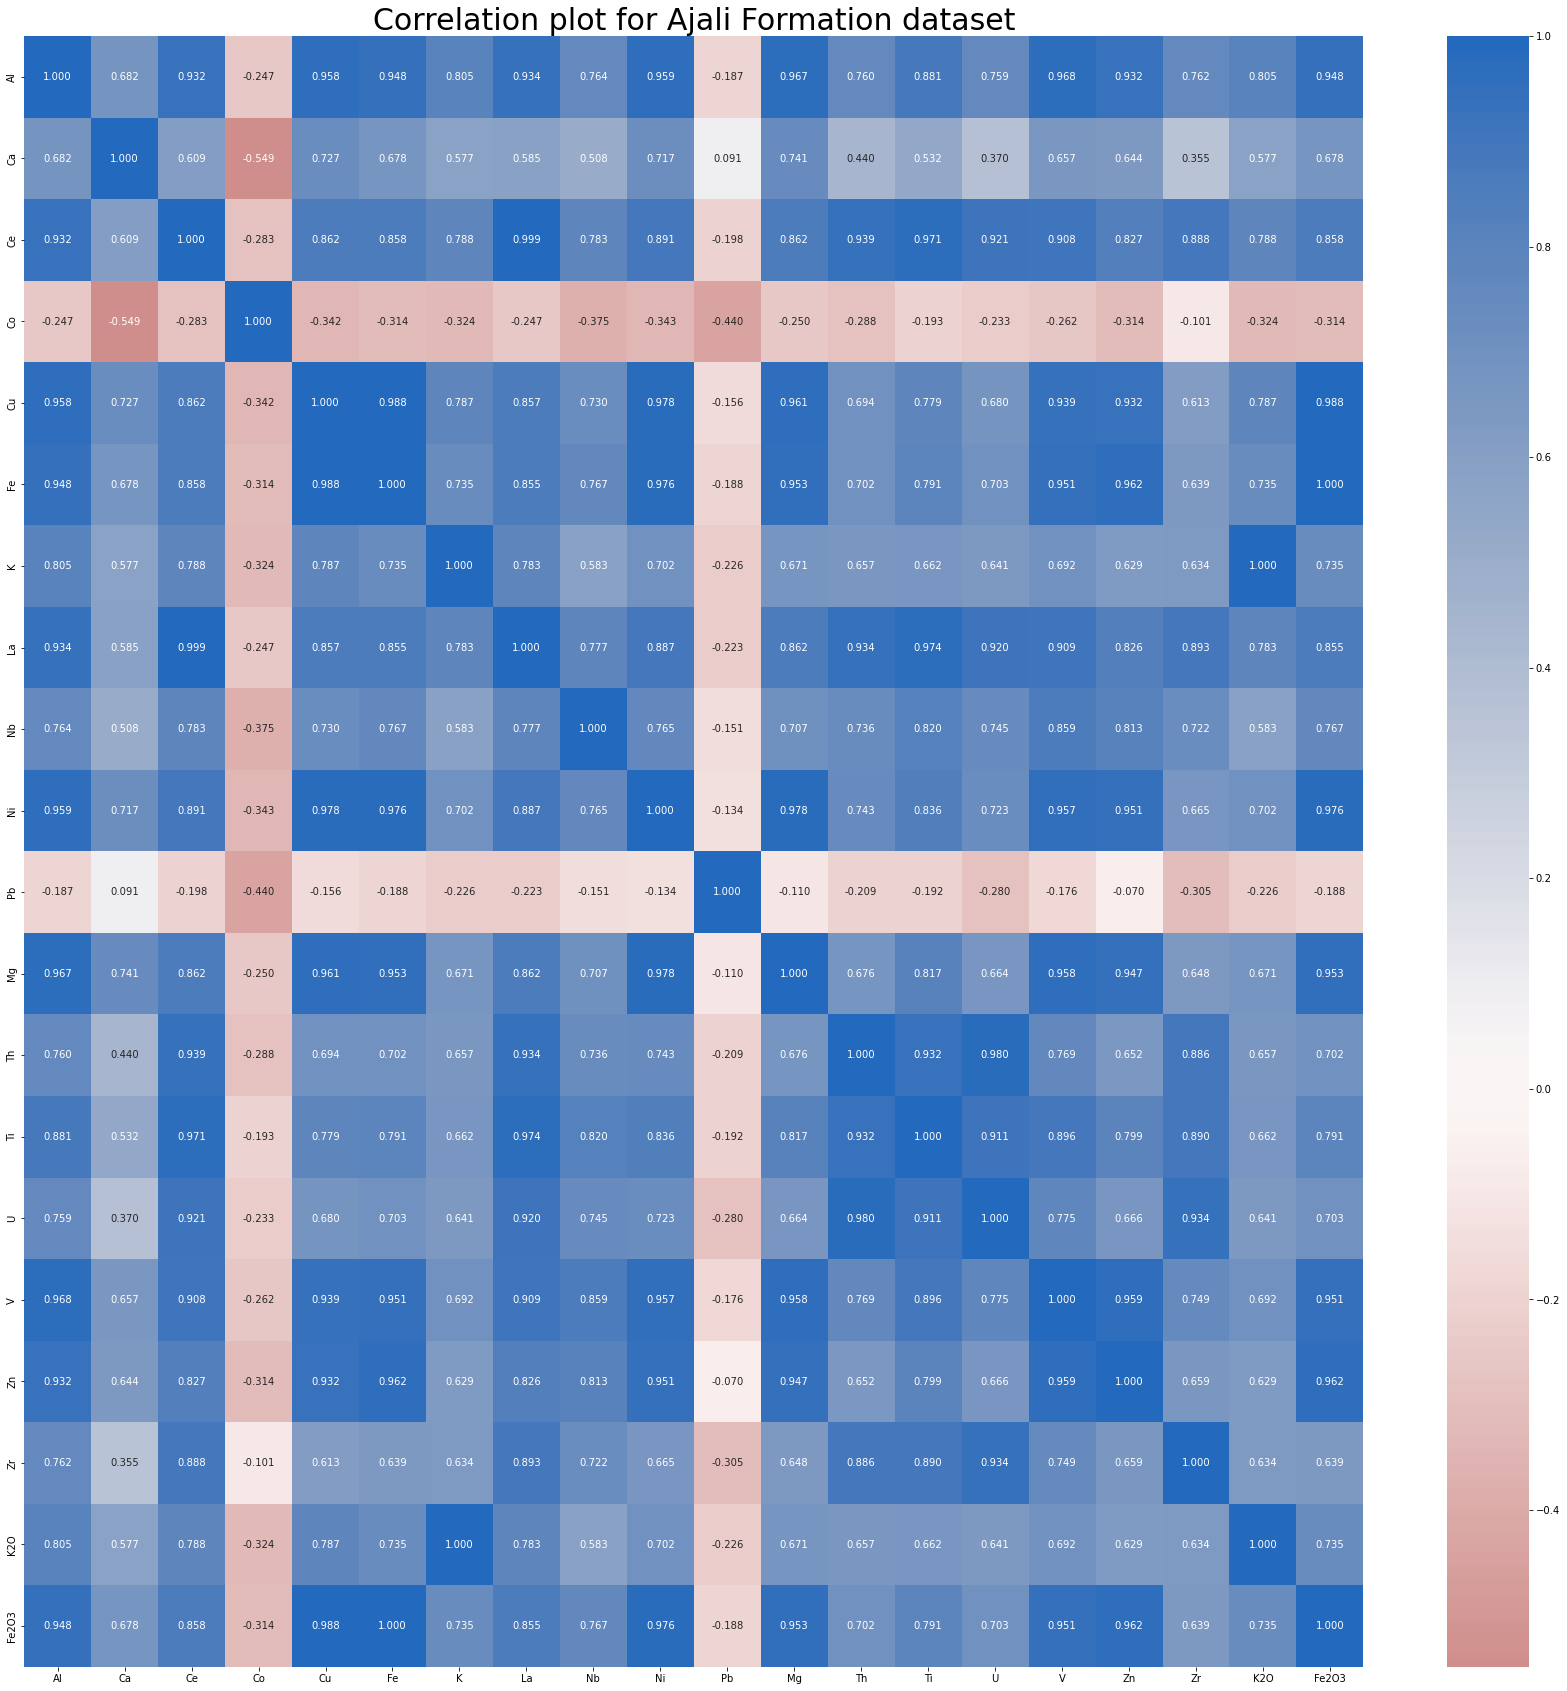

In [22]:
# Plot scatterplot
numeric_vars = ['Al', 'Ca', 'Ce', 'Co', 'Cu', 'Fe', 'K', 'La', 'Nb',
       'Ni', 'Pb', 'Mg', 'Th', 'Ti', 'U', 'V', 'Zn', 'Zr', 'K2O',
       'Fe2O3']
# correlation plot
plt.figure(figsize = [30, 30])
sb.heatmap(df_ajali[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

plt.title('Correlation plot for Ajali Formation dataset', fontsize=30)

plt.savefig("ajali_corr.jpg", dpi=500)
plt.show();

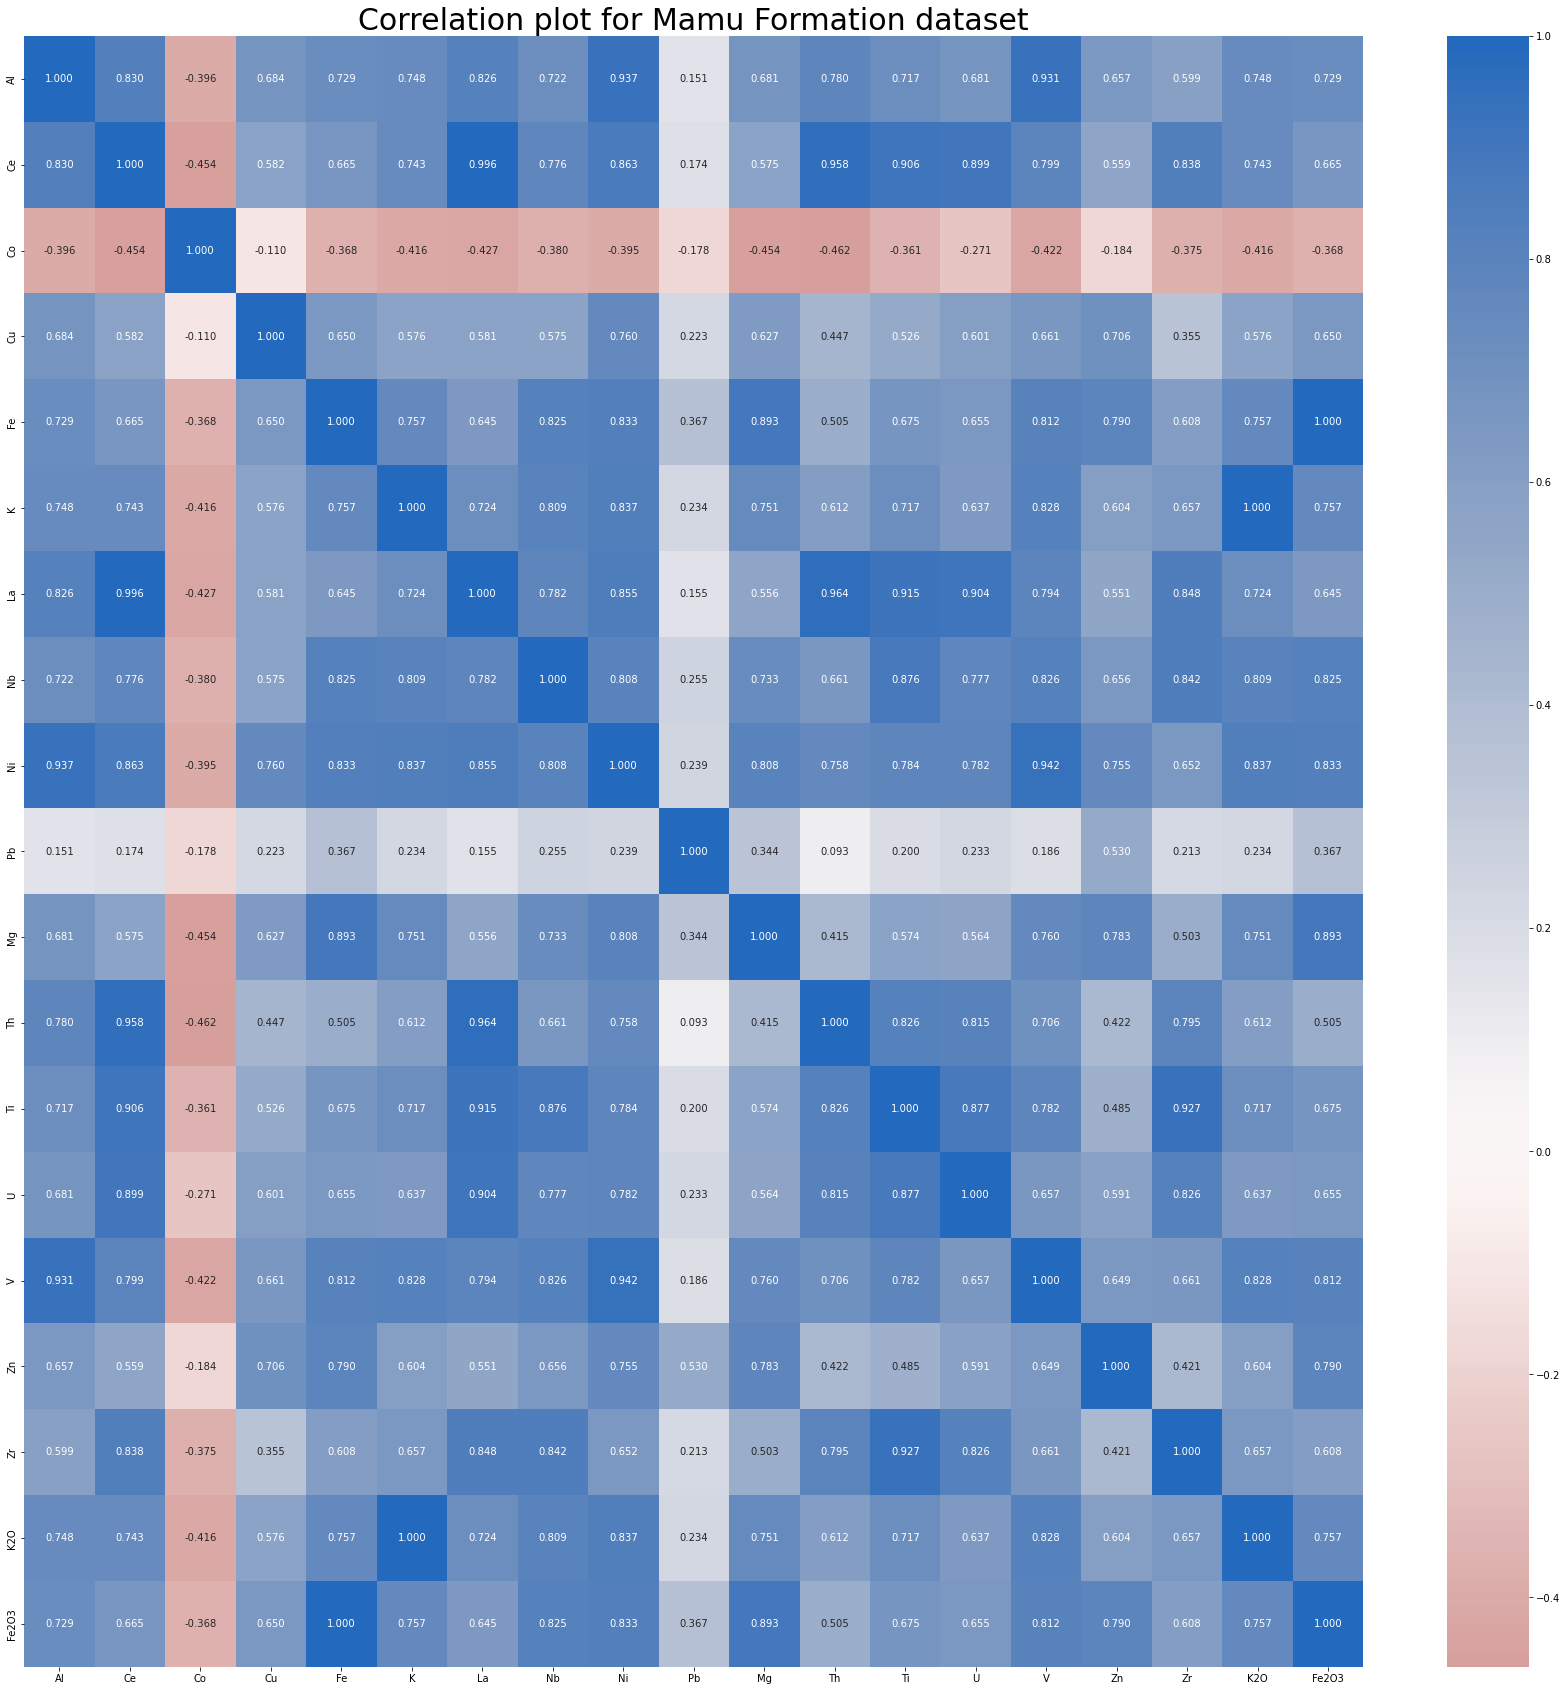

In [23]:
# Plot scatterplot
numeric_vars = ['Al', 'Ca', 'Ce', 'Co', 'Cu', 'Fe', 'K', 'La', 'Nb',
       'Ni', 'Pb', 'Mg', 'Th', 'Ti', 'U', 'V', 'Zn', 'Zr', 'K2O',
       'Fe2O3']
# correlation plot
plt.figure(figsize = [30, 30])
sb.heatmap(df_mamu[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

plt.title('Correlation plot for Mamu Formation dataset', fontsize=30)

plt.savefig("mamu_corr.jpg", dpi=500)
plt.show();

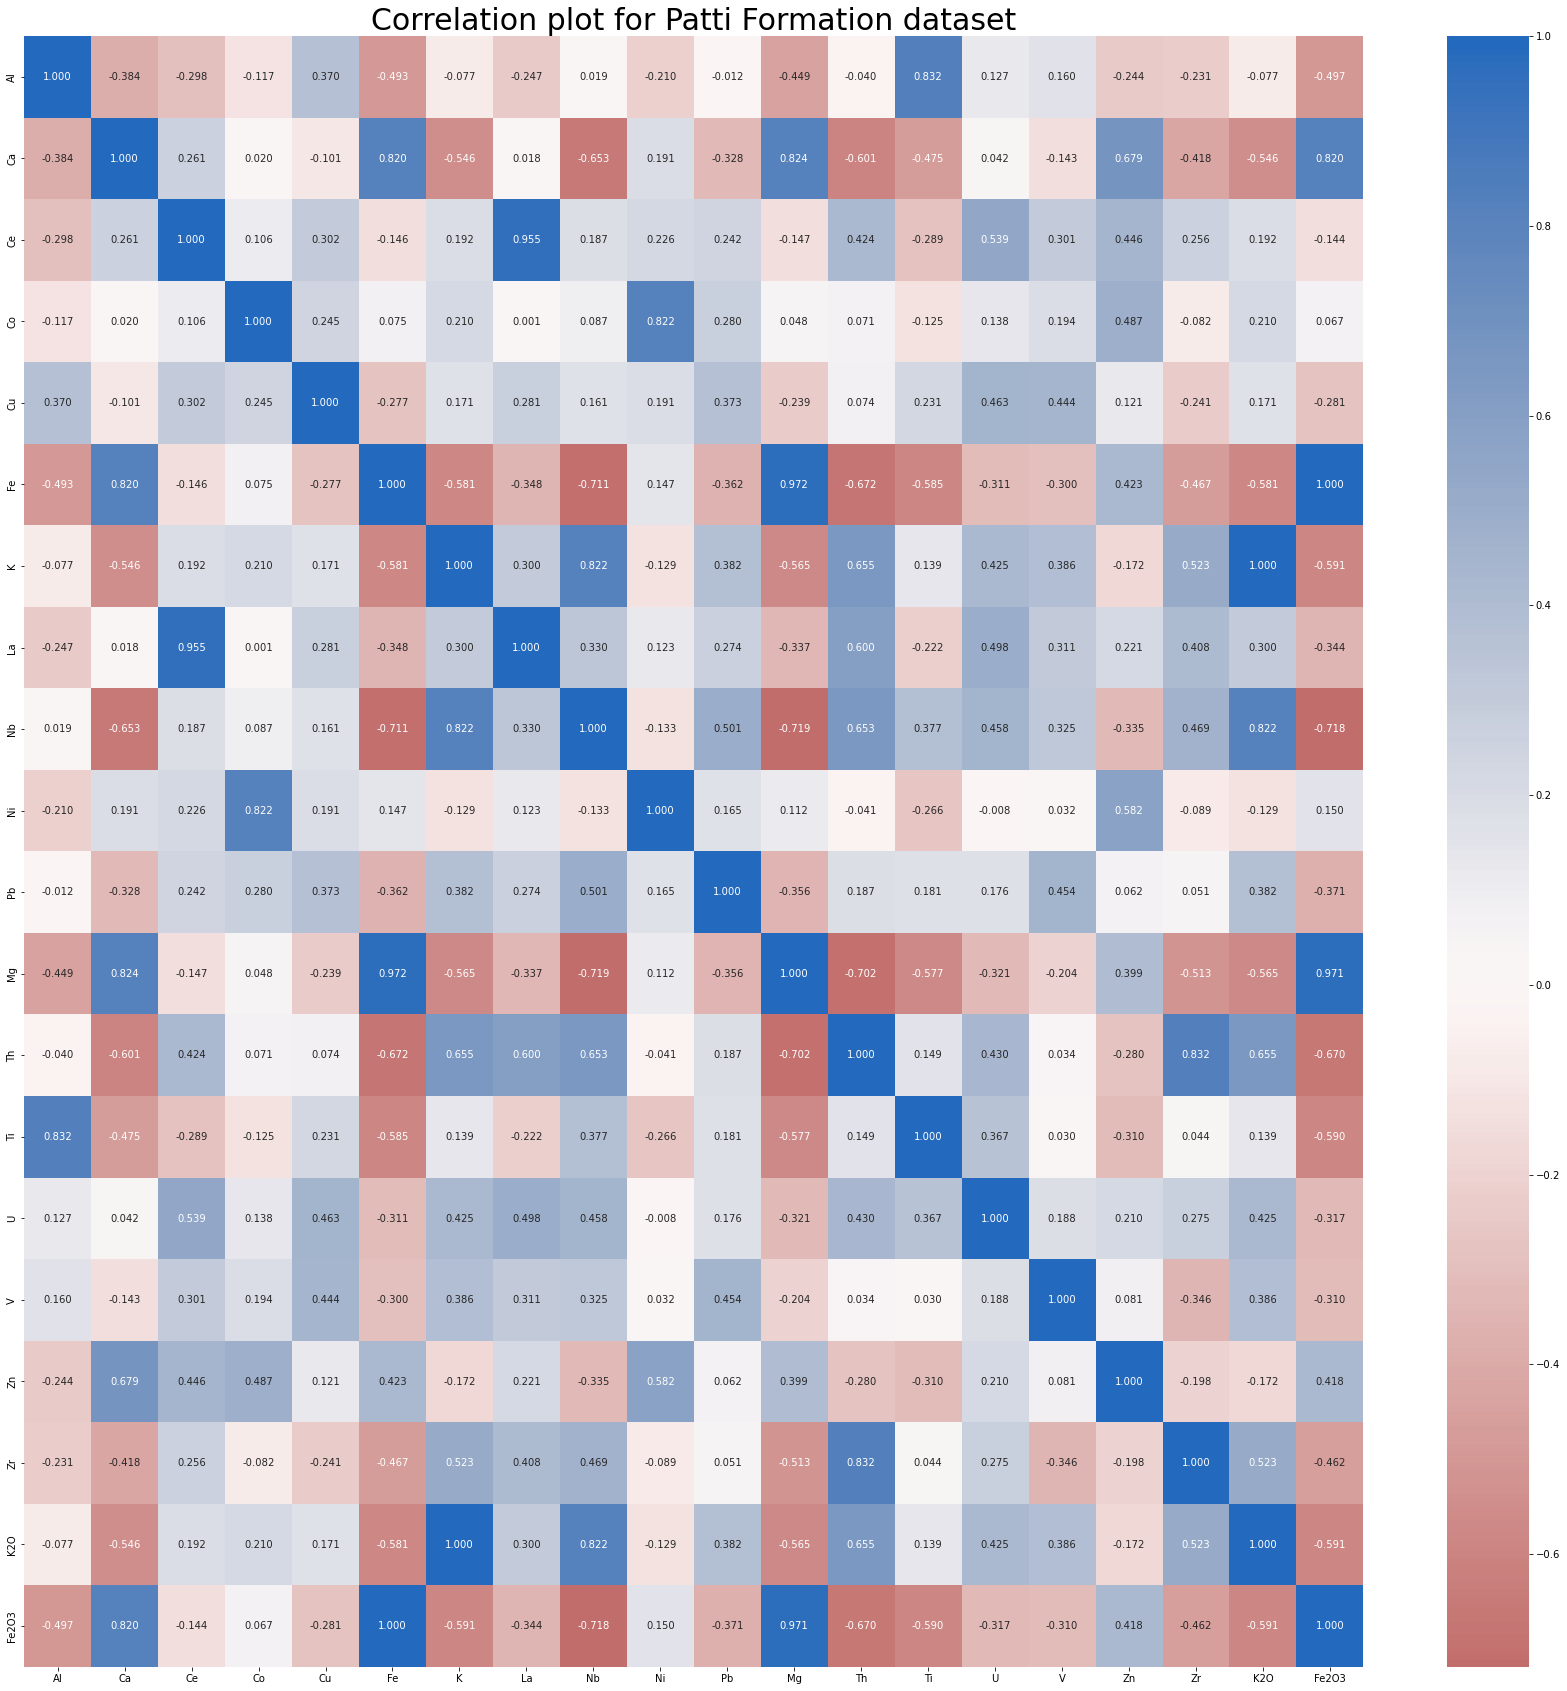

In [24]:
# Plot scatterplot
numeric_vars = ['Al', 'Ca', 'Ce', 'Co', 'Cu', 'Fe', 'K', 'La', 'Nb',
       'Ni', 'Pb', 'Mg', 'Th', 'Ti', 'U', 'V', 'Zn', 'Zr', 'K2O',
       'Fe2O3']
# correlation plot
plt.figure(figsize = [30, 30])
sb.heatmap(df_patti[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

plt.title('Correlation plot for Patti Formation dataset', fontsize=30)

plt.savefig("patti_corr.jpg", dpi=500)
plt.show();

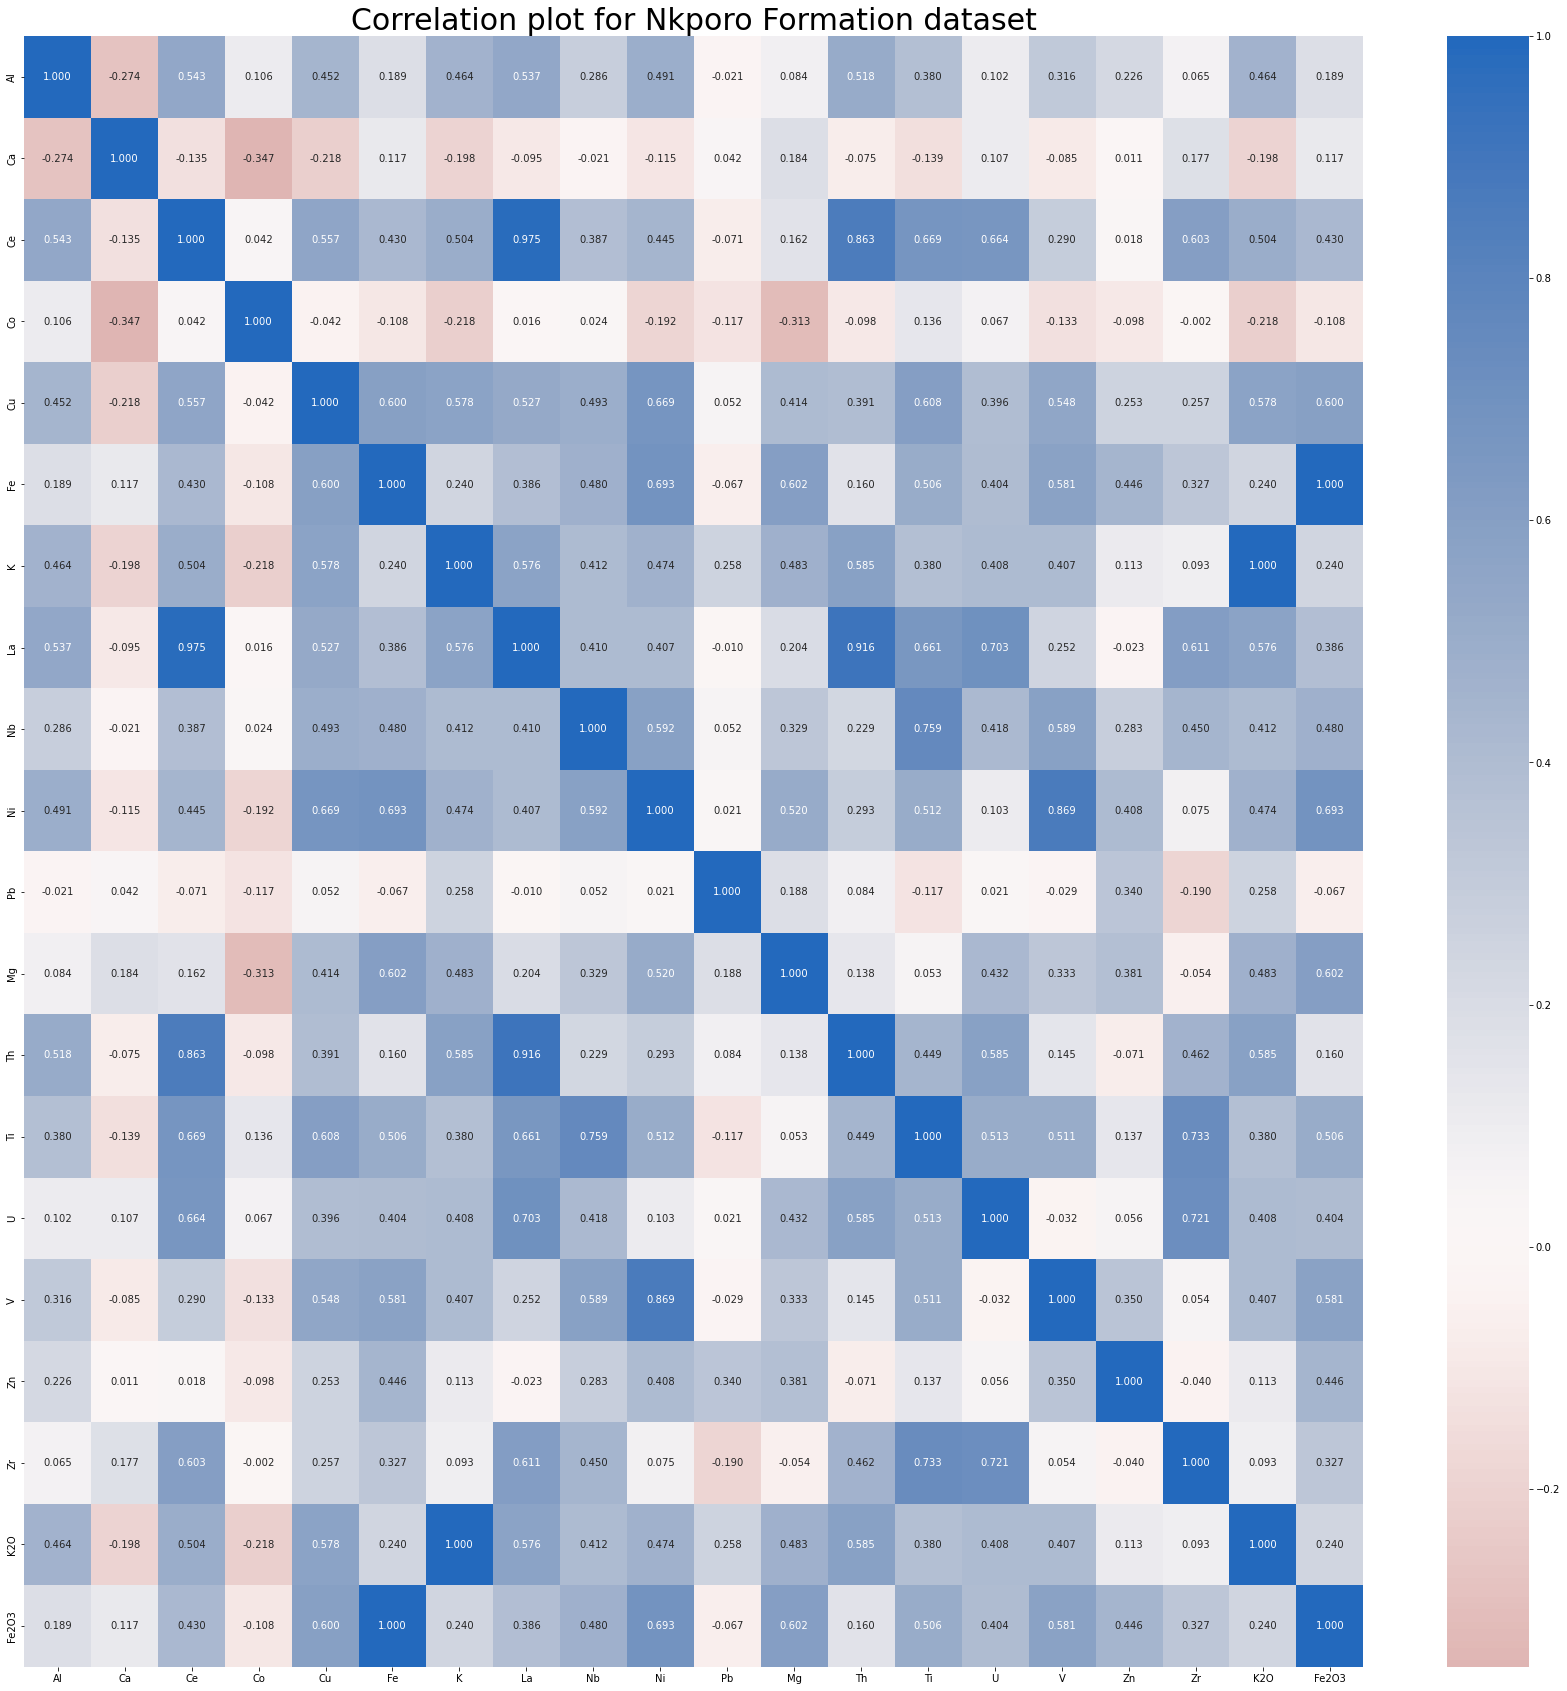

In [25]:
# Plot scatterplot
numeric_vars = ['Al', 'Ca', 'Ce', 'Co', 'Cu', 'Fe', 'K', 'La', 'Nb',
       'Ni', 'Pb', 'Mg', 'Th', 'Ti', 'U', 'V', 'Zn', 'Zr', 'K2O',
       'Fe2O3']
# correlation plot
plt.figure(figsize = [30, 30])
sb.heatmap(df_nkporo[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

plt.title('Correlation plot for Nkporo Formation dataset', fontsize=30)

plt.savefig("nkporo_corr.jpg", dpi=500)
plt.show();

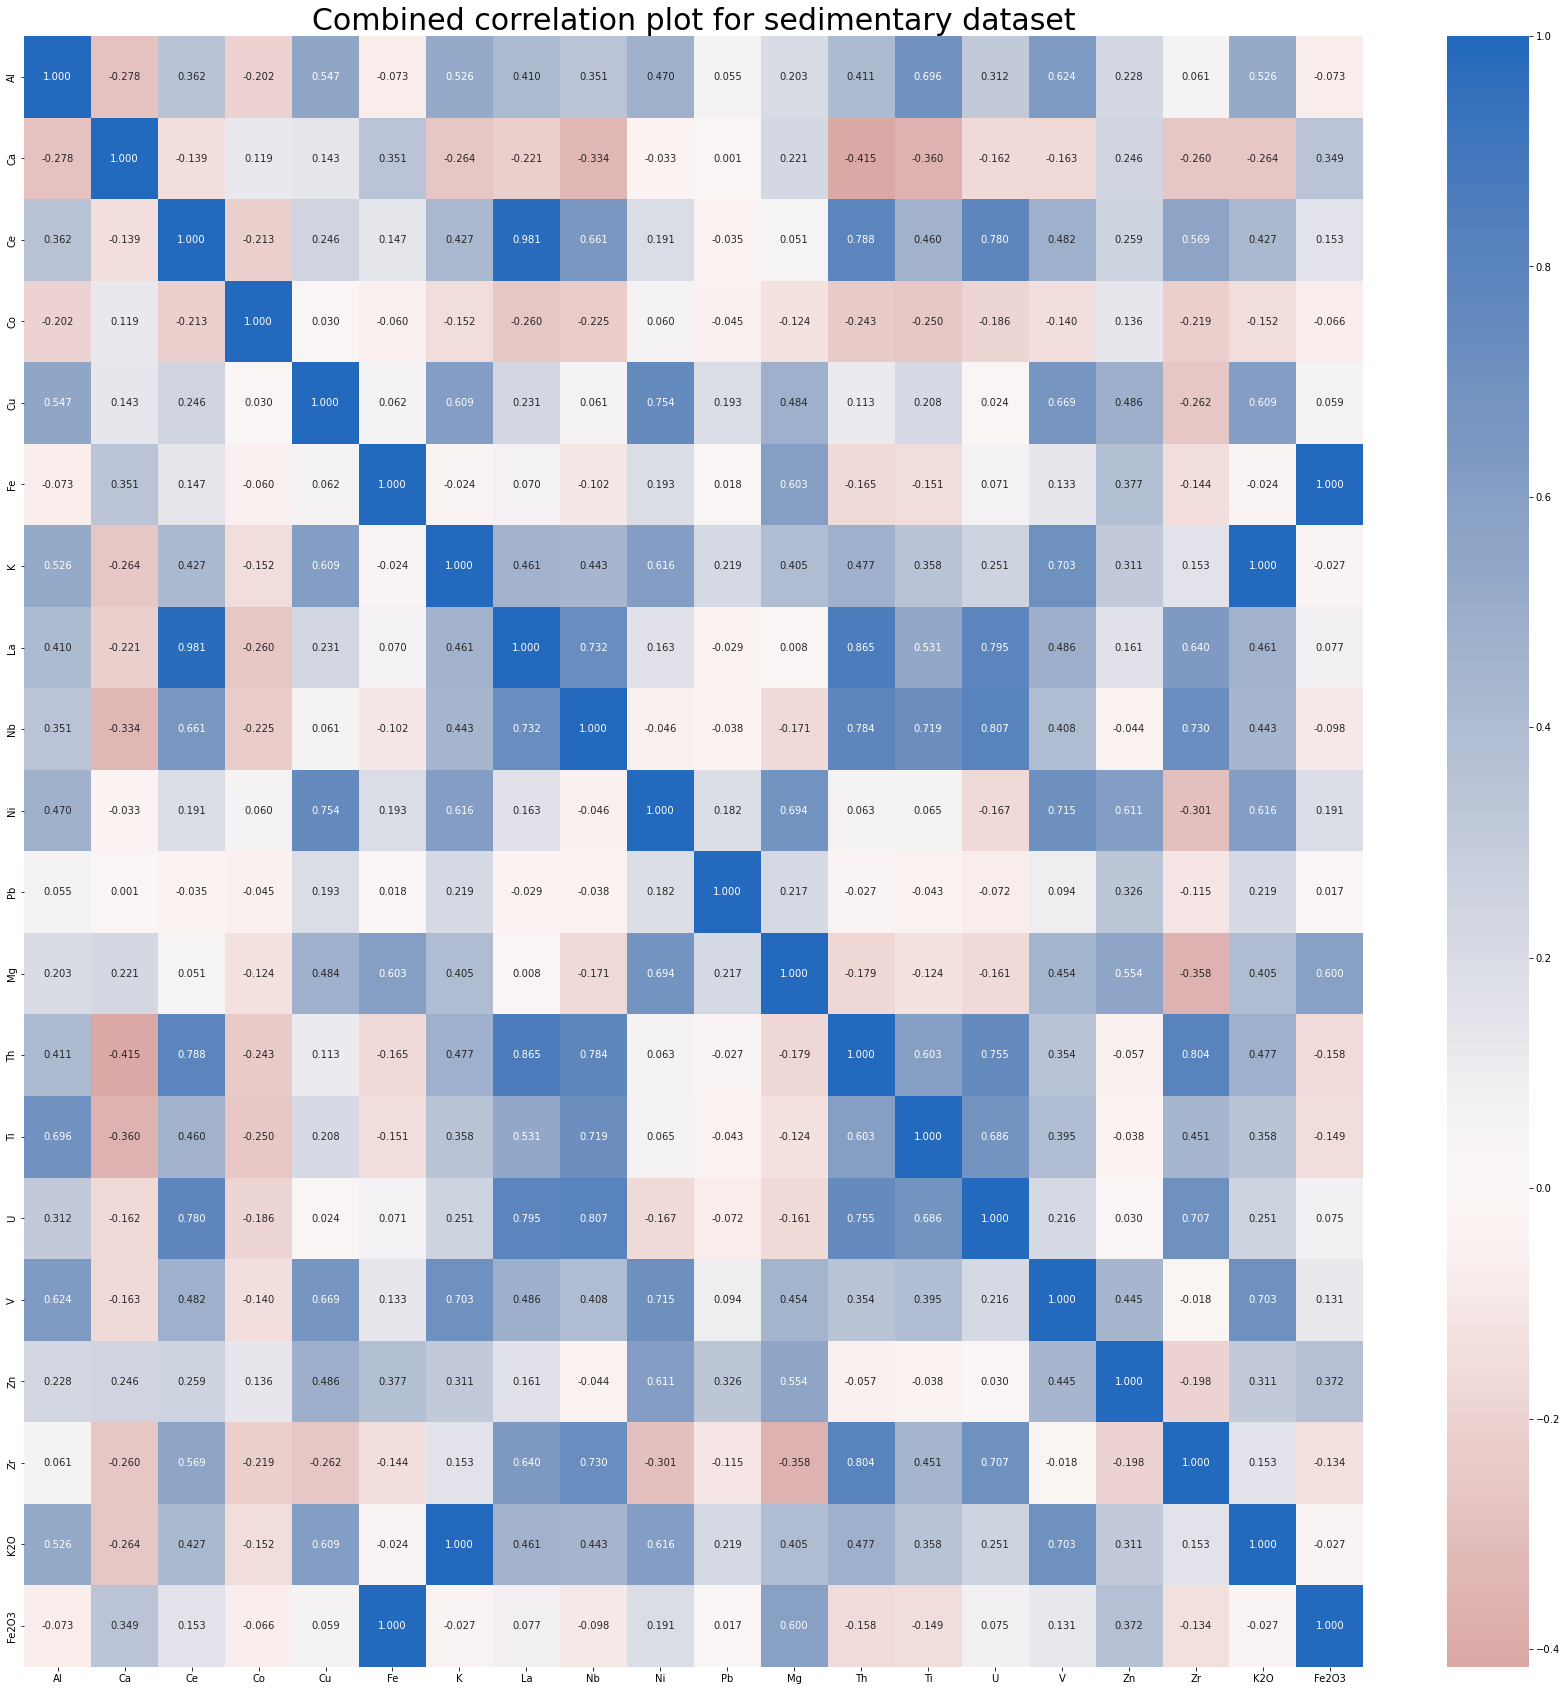

In [26]:
# Plot scatterplot
numeric_vars = ['Al', 'Ca', 'Ce', 'Co', 'Cu', 'Fe', 'K', 'La', 'Nb',
       'Ni', 'Pb', 'Mg', 'Th', 'Ti', 'U', 'V', 'Zn', 'Zr', 'K2O',
       'Fe2O3']
# correlation plot
plt.figure(figsize = [30, 30])
sb.heatmap(comb_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

plt.title('Combined correlation plot for sedimentary dataset', fontsize=30)
plt.savefig("combined.jpg", dpi=500)
plt.show();

## PCA analysis

In [27]:
label = list(comb_df['Analyte Symbol'])

In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(comb_df.iloc[:,1:])
df_scaled = pd.DataFrame(df_scaled)

In [29]:
df_scaled.columns = numeric_vars

In [30]:
df_scaled.set_axis(label, axis=0, inplace=True)

In [31]:
df_scaled.index

Index(['nkp_nzam', 'nkp_nzam', 'nkp_nzam', 'nkp_nzam', 'nkp_nzam', 'nkp_nzam',
       'nkp_nzam', 'nkp_nzam', 'nkp_nzam', 'nkp_nzam',
       ...
       'mamu_owan', 'mamu_anam', 'mamu_anam', 'mamu_anam', 'mamu_anam',
       'mamu_anam', 'mamu_anam', 'mamu_anam', 'mamu_anam', 'mamu_anam'],
      dtype='object', length=140)

In [32]:
pca_2c = PCA(n_components = 2)
x_pca_2c = pca_2c.fit_transform(df_scaled)
x_pca_2c

array([[-2.98476388e-01, -1.17582708e+00],
       [-5.29035626e-01, -1.96827173e+00],
       [-1.82243067e-01, -2.64035507e+00],
       [-5.34417319e-01, -1.63855904e+00],
       [-5.00907061e-01, -3.77732305e-01],
       [-8.25675583e-01, -2.54949438e+00],
       [-9.76145181e-01, -1.70781471e+00],
       [-4.07764014e-01, -1.47996033e+00],
       [-3.79898857e-01, -2.31204785e+00],
       [-5.80800549e-02, -1.61101044e+00],
       [-3.73400034e-01, -1.52531385e+00],
       [-1.72985526e+00, -3.34905036e+00],
       [-2.05109655e-01, -2.91538374e+00],
       [-8.81911993e-01, -1.46858058e+00],
       [-1.84880635e+00, -1.61817185e+00],
       [-5.34212950e-01, -8.45181583e-01],
       [-1.25296093e+00, -2.53992752e+00],
       [ 5.88790517e+00,  1.42285923e+00],
       [ 1.07016418e+00,  7.92782392e-01],
       [ 2.54830829e-02, -4.74343081e-01],
       [ 8.99368666e-01,  4.94521267e-01],
       [ 3.13889428e+00,  1.24757693e+00],
       [-1.42200731e+00, -3.00532642e+00],
       [-2.

In [33]:
pca_2c.explained_variance_ratio_.sum()

0.5723676461325643

In [34]:
pc2_df = pd.DataFrame(data=x_pca_2c, columns = ['PC1', 'PC2'])
pc2_df.set_axis(label, axis=0, inplace=True)

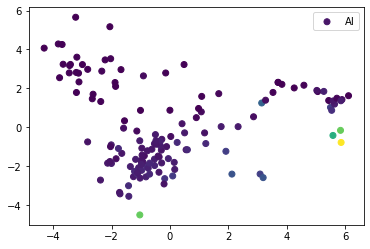

In [35]:
plt.scatter(x_pca_2c[:,0],x_pca_2c[:,1], c=df_scaled.Ca)
plt.legend(df_scaled);

In [82]:
pca_2c.components_

array([[-0.25773638,  0.12779038, -0.31190735,  0.1073665 , -0.18534779,
        -0.00640204, -0.29087251, -0.32786007, -0.29864595, -0.16451351,
        -0.03289853, -0.07443472, -0.31523566, -0.27105482, -0.27141952,
        -0.27732813, -0.10596676, -0.19935051, -0.29087251, -0.00754777],
       [-0.08682633, -0.16110224,  0.07010552, -0.0535469 , -0.29951935,
        -0.23606096, -0.16337204,  0.10599129,  0.20132493, -0.36363496,
        -0.1384946 , -0.39294031,  0.202982  ,  0.14059839,  0.20754113,
        -0.21753133, -0.31566899,  0.31153004, -0.16337204, -0.23295484]])

In [86]:
df_comb_components = pd.DataFrame(pca_2c.components_,
                                 columns=df_scaled.columns.values,
                                 index=['Component 1', 'Component 2'])

df_comb_components

,Al,Ca,Ce,Co,Cu,Fe,K,La,Nb,Ni,Pb,Mg,Th,Ti,U,V,Zn,Zr,K2O,Fe2O3
Component 1,-0.257736,0.127790,-0.311907,0.107366,-0.185348,-0.006402,-0.290873,-0.327860,-0.298646,-0.164514,-0.032899,-0.074435,-0.315236,-0.271055,-0.271420,-0.277328,-0.105967,-0.199351,-0.290873,-0.007548
Component 2,-0.086826,-0.161102,0.070106,-0.053547,-0.299519,-0.236061,-0.163372,0.105991,0.201325,-0.363635,-0.138495,-0.392940,0.202982,0.140598,0.207541,-0.217531,-0.315669,0.311530,-0.163372,-0.232955


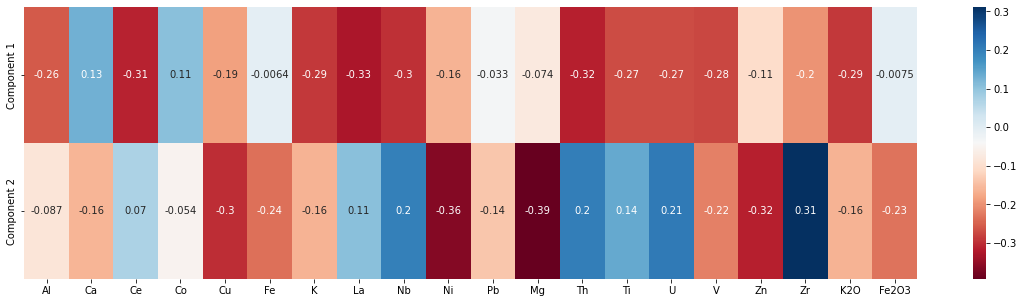

In [88]:
plt.figure(figsize=[20,5])
sb.heatmap(df_comb_components,
          annot=True,
          cmap='RdBu');

In [36]:
cat_lab = comb_df['Analyte Symbol'].value_counts().index.to_list()

<Figure size 432x288 with 0 Axes>

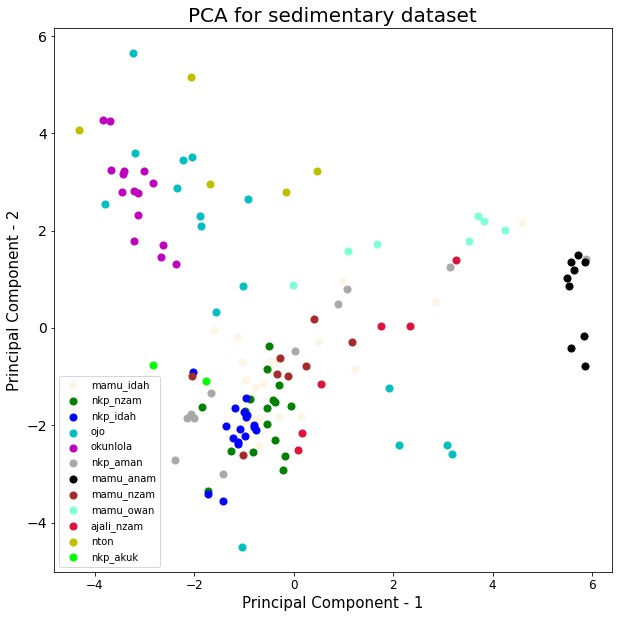

In [37]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("PCA for sedimentary dataset",fontsize=20)
targets = cat_lab
colors = ['#FDF5E6', 'g', 'b', 'c', 'm', '#A9A9A9','k', '#A52A2A', '#7FFFD4', '#DC143C', 'y', '#00FF00']
for target, color in zip(targets,colors):
    indicesToKeep = df_scaled.index == target
    plt.scatter(pc2_df.loc[indicesToKeep, 'PC1']
               , pc2_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})
plt.savefig('pca.jpg', dpi=500);


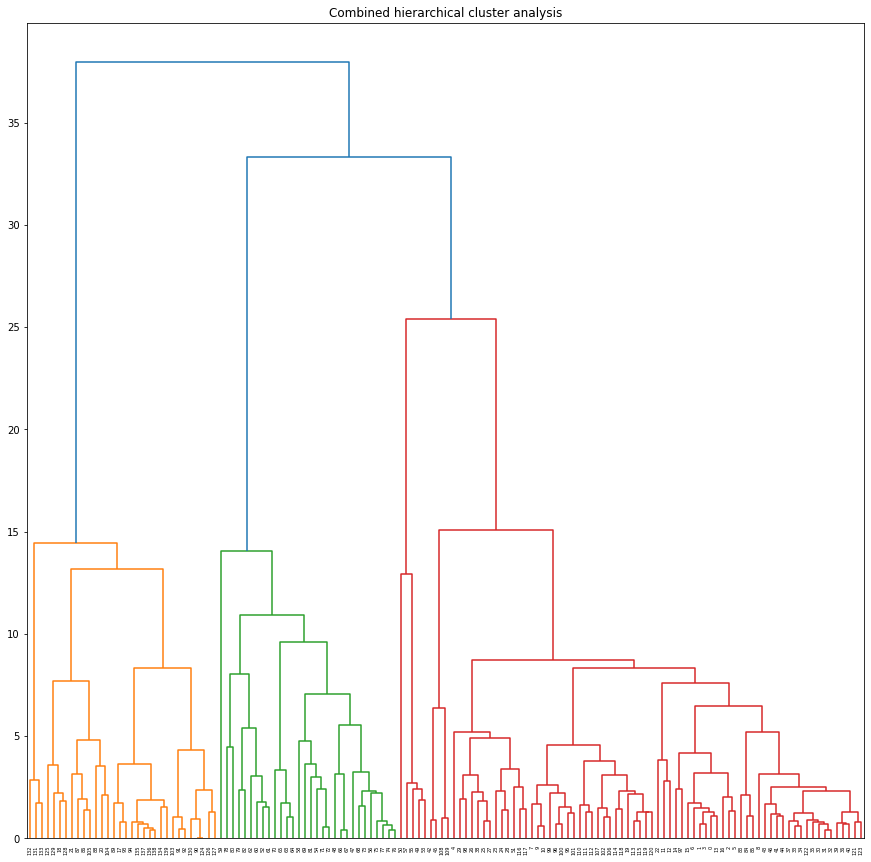

In [38]:
hier = linkage(df_scaled, method='ward')
plt.figure(figsize=(15,15))
plt.title('Combined hierarchical cluster analysis')
dendrogram(hier)
plt.show()
#plt.savefig('combined hierachical cluster analysis.jpg', dpi=500);

## Nkporo PCA and cluster

In [39]:
# Cleaning
label_nkp = list(df_nkporo['Analyte Symbol'])
scaler_nkp = StandardScaler()
df_scaled_nkp = scaler_nkp.fit_transform(df_nkporo.iloc[:,1:])
df_scaled_nkp = pd.DataFrame(df_scaled_nkp)
df_scaled_nkp.columns = numeric_vars
df_scaled_nkp.set_axis(label_nkp, axis=0, inplace=True)

In [40]:
# Fitting
pca_2c_nkp = PCA(n_components = 2)
x_pca_2c_nkp = pca_2c_nkp.fit_transform(df_scaled_nkp)
pca_2c_nkp.explained_variance_ratio_.sum()

0.5381557497922204

In [41]:
# Change to df
pc2_df_nkp = pd.DataFrame(data=x_pca_2c_nkp, columns = ['PC1', 'PC2'])
pc2_df_nkp.set_axis(label_nkp, axis=0, inplace=True)
cat_lab_nkp = df_nkporo['Analyte Symbol'].value_counts().index.to_list()

<Figure size 432x288 with 0 Axes>

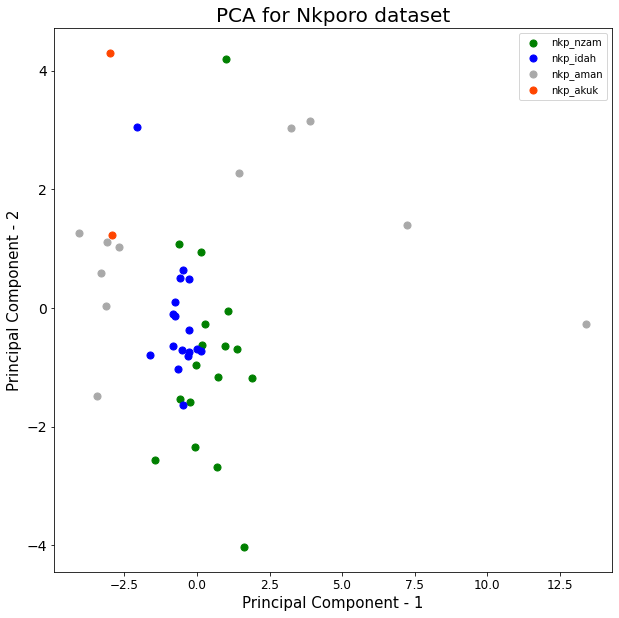

In [42]:
# Plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("PCA for Nkporo dataset",fontsize=20)
targets = cat_lab_nkp
colors = ['g', 'b', '#A9A9A9', '#FF4500']
for target, color in zip(targets,colors):
    indicesToKeep = df_scaled_nkp.index == target
    plt.scatter(pc2_df_nkp.loc[indicesToKeep, 'PC1']
               , pc2_df_nkp.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})
plt.savefig('pca_nkporo.jpg', dpi=500);

C:\Users\omasan.akperi\anaconda_new\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


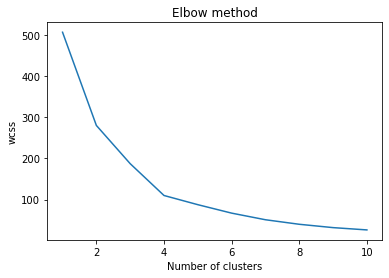

In [43]:
# Import dataset
X_nkp = pc2_df_nkp.values
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X_nkp)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [44]:
# Fitting kmeans to dataset
kmeans_nkp = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans_nkp = kmeans_nkp.fit_predict(X_nkp)

<Figure size 432x288 with 0 Axes>

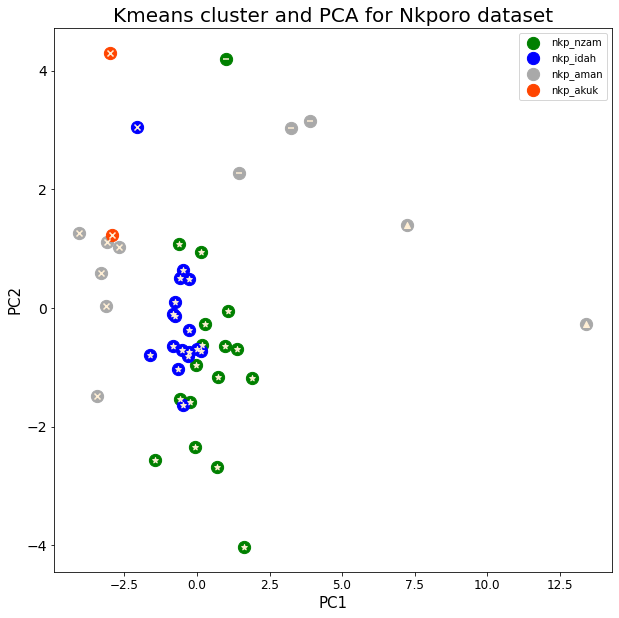

In [45]:
# Plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("PCA for Nkporo dataset",fontsize=20)
targets = cat_lab_nkp
colors = ['g', 'b', '#A9A9A9', '#FF4500']
for target, color in zip(targets,colors):
    indicesToKeep = df_scaled_nkp.index == target
    plt.scatter(pc2_df_nkp.loc[indicesToKeep, 'PC1']
               , pc2_df_nkp.loc[indicesToKeep, 'PC2'], c = color, s = 150)
    
plt.legend(targets,prop={'size': 10})

plt.scatter(X_nkp[Y_kmeans_nkp==0, 0], X_nkp[Y_kmeans_nkp==0,1], label='Cluster 1', marker='*', c='#FFEFD5')
plt.scatter(X_nkp[Y_kmeans_nkp==1, 0], X_nkp[Y_kmeans_nkp==1,1], label='Cluster 2', marker='x', c='#FFEFD5')
plt.scatter(X_nkp[Y_kmeans_nkp==2, 0], X_nkp[Y_kmeans_nkp==2,1], label='Cluster 3', marker='^', c='#FFEFD5')
plt.scatter(X_nkp[Y_kmeans_nkp==3, 0], X_nkp[Y_kmeans_nkp==3,1], label='Cluster 4', marker='_', c='#FFEFD5')

#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Kmeans cluster and PCA for Nkporo dataset', fontsize=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend()
plt.savefig('pca_and_clusters_nkp.jpg', dpi=500)
plt.show();

## Mamu PCA and cluster

In [46]:
# Cleaning
label_ma = list(df_mamu['Analyte Symbol'])
scaler_ma = StandardScaler()
df_scaled_ma = scaler_ma.fit_transform(df_mamu.iloc[:,1:])
df_scaled_ma = pd.DataFrame(df_scaled_ma)
df_scaled_ma.columns = numeric_vars
df_scaled_ma.set_axis(label_ma, axis=0, inplace=True)

In [47]:
# Fitting
pca_2c_ma = PCA(n_components = 2)
x_pca_2c_ma = pca_2c_ma.fit_transform(df_scaled_ma)
pca_2c_ma.explained_variance_ratio_.sum()

0.761329651580233

In [48]:
# Change to df
pc2_df_ma = pd.DataFrame(data=x_pca_2c_ma, columns = ['PC1', 'PC2'])
pc2_df_ma.set_axis(label_ma, axis=0, inplace=True)
cat_lab_ma = df_mamu['Analyte Symbol'].value_counts().index.to_list()

<Figure size 432x288 with 0 Axes>

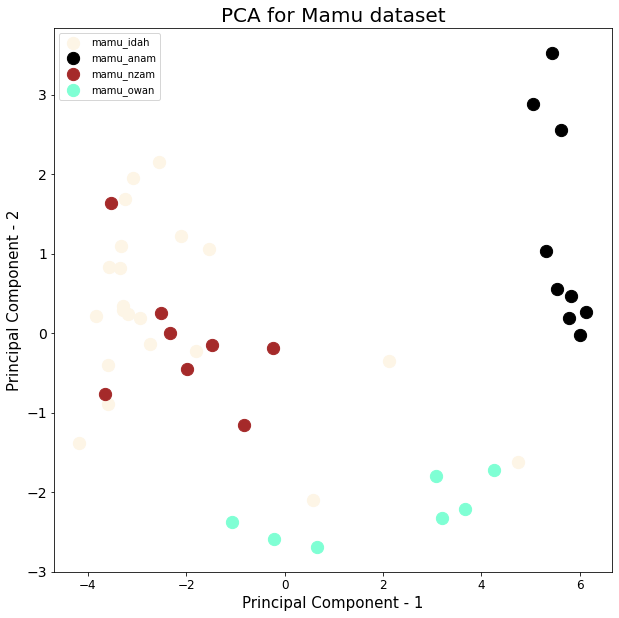

In [49]:
# Plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("PCA for Mamu dataset",fontsize=20)
targets = cat_lab_ma
colors = ['#FDF5E6', 'k', '#A52A2A', '#7FFFD4']
for target, color in zip(targets,colors):
    indicesToKeep = df_scaled_ma.index == target
    plt.scatter(pc2_df_ma.loc[indicesToKeep, 'PC1']
               , pc2_df_ma.loc[indicesToKeep, 'PC2'], c = color, s = 150)

plt.legend(targets,prop={'size': 10})
plt.savefig('pca_mamu.jpg', dpi=500);

C:\Users\omasan.akperi\anaconda_new\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


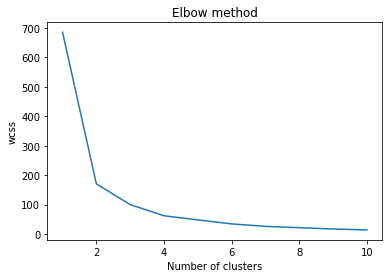

In [50]:
# Import dataset
X_ma = pc2_df_ma.values
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X_ma)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [51]:
# Fitting kmeans to dataset
kmeans_ma = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans_ma = kmeans_ma.fit_predict(X_ma)

<Figure size 432x288 with 0 Axes>

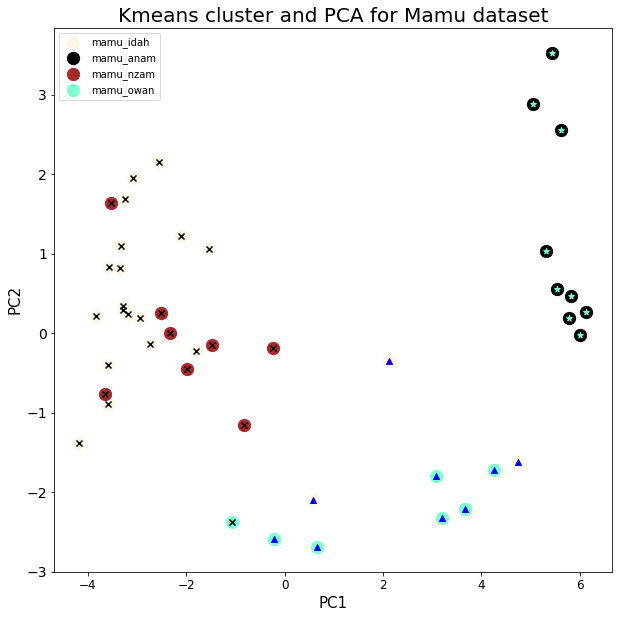

In [52]:
# Plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("PCA for Mamu dataset",fontsize=20)
targets = cat_lab_ma
colors = ['#FDF5E6', 'k', '#A52A2A', '#7FFFD4']
for target, color in zip(targets,colors):
    indicesToKeep = df_scaled_ma.index == target
    plt.scatter(pc2_df_ma.loc[indicesToKeep, 'PC1']
               , pc2_df_ma.loc[indicesToKeep, 'PC2'], c = color, s = 150)
    
plt.legend(targets,prop={'size': 10})

plt.scatter(X_ma[Y_kmeans_ma==0, 0], X_ma[Y_kmeans_ma==0,1], label='Cluster 1', marker='*', c='#7FFFD4')
plt.scatter(X_ma[Y_kmeans_ma==1, 0], X_ma[Y_kmeans_ma==1,1], label='Cluster 2', marker='x', c='k')
plt.scatter(X_ma[Y_kmeans_ma==2, 0], X_ma[Y_kmeans_ma==2,1], label='Cluster 3', marker='^', c='b')
#plt.scatter(X_ma[Y_kmeans_ma==3, 0], X_ma[Y_kmeans_ma==3,1], label='Cluster 4', marker='_', c='#FFEFD5')

#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Kmeans cluster and PCA for Mamu dataset', fontsize=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend()
plt.savefig('pca_and_clusters_mamu.jpg', dpi=500)
plt.show();

## Ajali PCA and cluster

In [53]:
# Cleaning
label_aj = list(df_ajali['Analyte Symbol'])
scaler_aj = StandardScaler()
df_scaled_aj = scaler_aj.fit_transform(df_ajali.iloc[:,1:])
df_scaled_aj = pd.DataFrame(df_scaled_aj)
df_scaled_aj.columns = numeric_vars
df_scaled_aj.set_axis(label_aj, axis=0, inplace=True)

In [54]:
# Fitting
pca_2c_aj = PCA(n_components = 2)
x_pca_2c_aj = pca_2c_aj.fit_transform(df_scaled_aj)
pca_2c_aj.explained_variance_ratio_.sum()

0.8277443298866184

In [55]:
# Change to df
pc2_df_aj = pd.DataFrame(data=x_pca_2c_aj, columns = ['PC1', 'PC2'])
pc2_df_aj.set_axis(label_aj, axis=0, inplace=True)
cat_lab_aj = df_ajali['Analyte Symbol'].value_counts().index.to_list()

<Figure size 432x288 with 0 Axes>

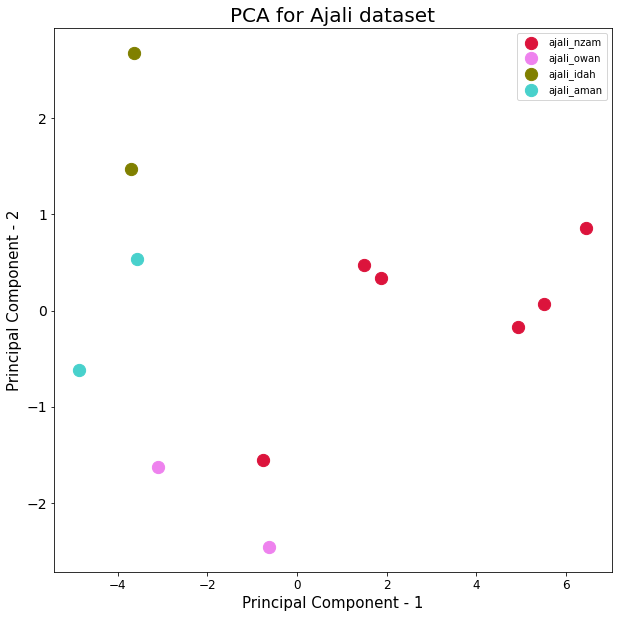

In [56]:
# Plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("PCA for Ajali dataset",fontsize=20)
targets = cat_lab_aj
colors = ['#DC143C', '#EE82EE','#808000', '#48D1CC']
for target, color in zip(targets,colors):
    indicesToKeep = df_scaled_aj.index == target
    plt.scatter(pc2_df_aj.loc[indicesToKeep, 'PC1']
               , pc2_df_aj.loc[indicesToKeep, 'PC2'], c = color, s = 150)

plt.legend(targets,prop={'size': 10})
plt.savefig('pca_ajali.jpg', dpi=500);

C:\Users\omasan.akperi\anaconda_new\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


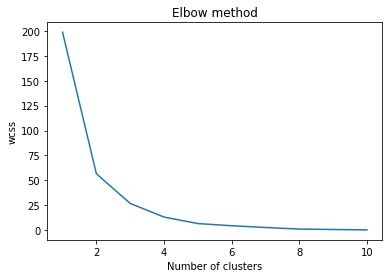

In [57]:
# Import dataset
X_aj = pc2_df_aj.values
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X_aj)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [58]:
# Fitting kmeans to dataset
kmeans_aj = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans_aj = kmeans_ma.fit_predict(X_aj)

<Figure size 432x288 with 0 Axes>

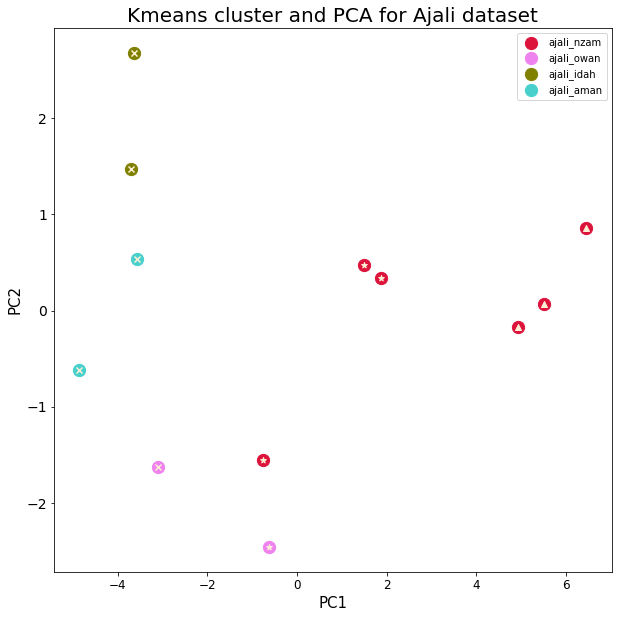

In [59]:
# Plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("PCA for Ajali dataset",fontsize=20)
targets = cat_lab_aj
colors = ['#DC143C', '#EE82EE','#808000', '#48D1CC']
for target, color in zip(targets,colors):
    indicesToKeep = df_scaled_aj.index == target
    plt.scatter(pc2_df_aj.loc[indicesToKeep, 'PC1']
               , pc2_df_aj.loc[indicesToKeep, 'PC2'], c = color, s = 150)
    
plt.legend(targets,prop={'size': 10})

plt.scatter(X_aj[Y_kmeans_aj==0, 0], X_aj[Y_kmeans_aj==0,1], label='Cluster 1', marker='*', c='#FFEFD5')
plt.scatter(X_aj[Y_kmeans_aj==1, 0], X_aj[Y_kmeans_aj==1,1], label='Cluster 2', marker='x', c='#FFEFD5')
plt.scatter(X_aj[Y_kmeans_aj==2, 0], X_aj[Y_kmeans_aj==2,1], label='Cluster 3', marker='^', c='#FFEFD5')


#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='yellow', label='Centroids')
plt.title('Kmeans cluster and PCA for Ajali dataset', fontsize=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend()
plt.savefig('pca_and_clusters_ajali.jpg', dpi=500)
plt.show();

## Patti PCA and cluster

In [60]:
# Cleaning
label_pa = list(df_patti['Analyte Symbol'])
scaler_pa = StandardScaler()
df_scaled_pa = scaler_pa.fit_transform(df_patti.iloc[:,1:])
df_scaled_pa = pd.DataFrame(df_scaled_pa)
df_scaled_pa.columns = numeric_vars
df_scaled_pa.set_axis(label_pa, axis=0, inplace=True)

In [61]:
# Fitting
pca_2c_pa = PCA(n_components = 2)
x_pca_2c_pa = pca_2c_pa.fit_transform(df_scaled_pa)
pca_2c_pa.explained_variance_ratio_.sum()

0.5660439359152394

In [62]:
df_patti['Analyte Symbol'].value_counts().index.to_list()

['ojo', 'okunlola', 'nton']

In [63]:
# Change to df
pc2_df_pa = pd.DataFrame(data=x_pca_2c_pa, columns = ['PC1', 'PC2'])
pc2_df_pa.set_axis(label_pa, axis=0, inplace=True)
cat_lab_pa = df_patti['Analyte Symbol'].value_counts().index.to_list()

<Figure size 432x288 with 0 Axes>

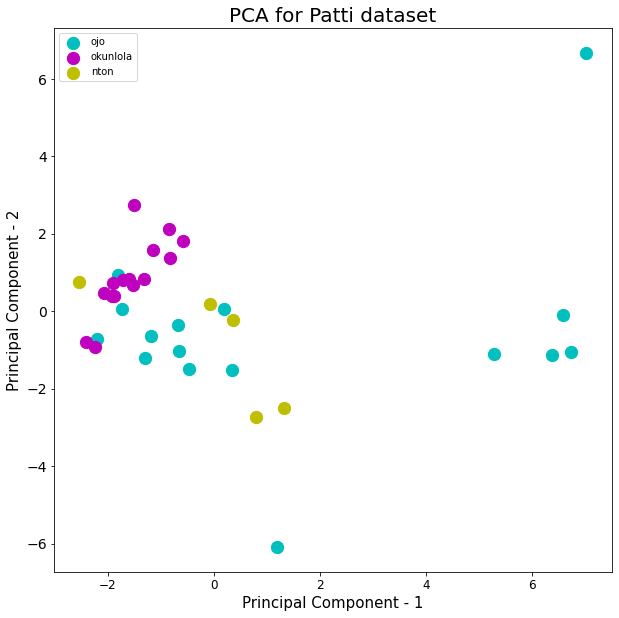

In [64]:
# Plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("PCA for Patti dataset",fontsize=20)
targets = cat_lab_pa
colors = ['c', 'm', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = df_scaled_pa.index == target
    plt.scatter(pc2_df_pa.loc[indicesToKeep, 'PC1']
               , pc2_df_pa.loc[indicesToKeep, 'PC2'], c = color, s = 150)

plt.legend(targets,prop={'size': 10})
plt.savefig('pca_patti.jpg', dpi=500);

C:\Users\omasan.akperi\anaconda_new\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


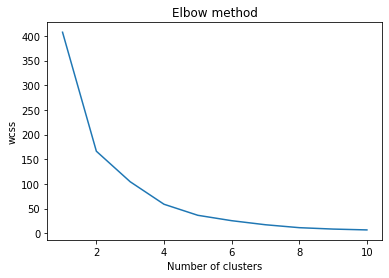

In [65]:
# Import dataset
X_pa = pc2_df_pa.values
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X_pa)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [66]:
# Fitting kmeans to dataset
kmeans_pa = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans_pa = kmeans_pa.fit_predict(X_pa)

In [67]:
targets

['ojo', 'okunlola', 'nton']

<Figure size 432x288 with 0 Axes>

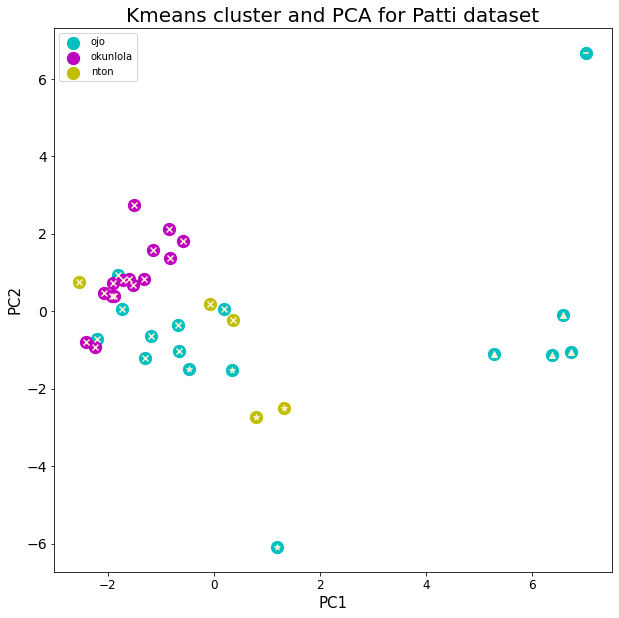

In [68]:
# Plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("PCA for Patti dataset",fontsize=20)
targets = cat_lab_pa
colors = ['c', 'm', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = df_scaled_pa.index == target
    plt.scatter(pc2_df_pa.loc[indicesToKeep, 'PC1']
               , pc2_df_pa.loc[indicesToKeep, 'PC2'], c = color, s = 150)
    
plt.legend(targets,prop={'size': 10},loc=2)

plt.scatter(X_pa[Y_kmeans_pa==0, 0], X_pa[Y_kmeans_pa==0,1], label='Cluster 1', marker='*', c='#FFEFD5')
plt.scatter(X_pa[Y_kmeans_pa==1, 0], X_pa[Y_kmeans_pa==1,1], label='Cluster 2', marker='x', c='#FFEFD5')
plt.scatter(X_pa[Y_kmeans_pa==2, 0], X_pa[Y_kmeans_pa==2,1], label='Cluster 3', marker='^', c='#FFEFD5')
plt.scatter(X_pa[Y_kmeans_pa==3, 0], X_pa[Y_kmeans_pa==3,1], label='Cluster 4', marker='_', c='#FFEFD5')

#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='yellow', label='Centroids')
plt.title('Kmeans cluster and PCA for Patti dataset', fontsize=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend()
plt.savefig('pca_and_clusters_patti.jpg', dpi=500)
plt.show();

In [69]:
# Import dataset
X = pc2_df.values

C:\Users\omasan.akperi\anaconda_new\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


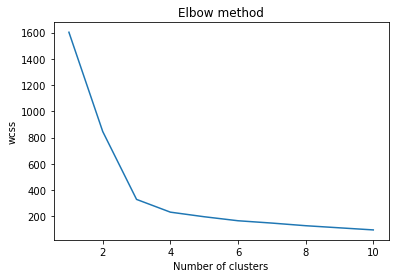

In [70]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [71]:
# Fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

<Figure size 432x288 with 0 Axes>

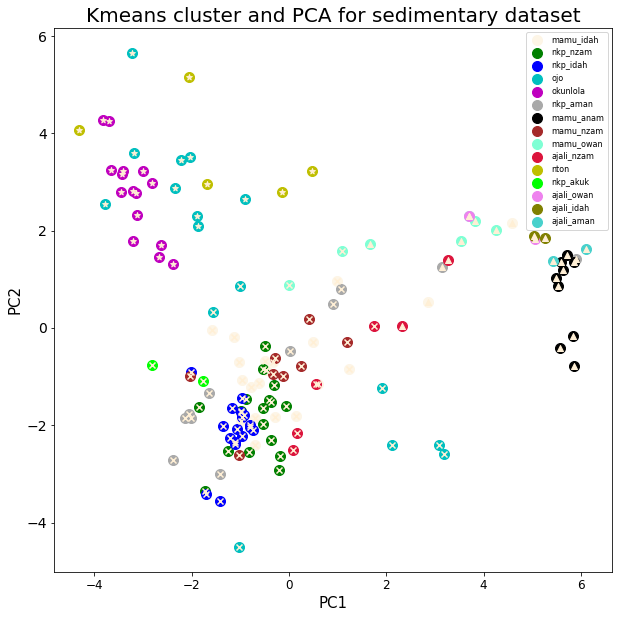

In [72]:
# Visualising the clusters
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("Principal Component Analysis of sedimentary formations dataset",fontsize=20)
targets = cat_lab
colors = ['#FDF5E6', 'g', 'b', 'c', 'm', '#A9A9A9','k', '#A52A2A', '#7FFFD4', '#DC143C', 'y', '#00FF00', '#EE82EE','#808000', '#48D1CC']
for target, color in zip(targets,colors):
    indicesToKeep = df_scaled.index == target
    plt.scatter(pc2_df.loc[indicesToKeep, 'PC1']
               , pc2_df.loc[indicesToKeep, 'PC2'], c = color, s = 100)

plt.legend(targets,prop={'size': 8})

#plt.figure()
#plt.figure(figsize=(10,10))
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0,1], label='Cluster 1', marker='*', c='#FFEFD5')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1,1], label='Cluster 2', marker='x', c='#FFEFD5')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2,1], label='Cluster 3', marker='^', c='#FFEFD5')

#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Kmeans cluster and PCA for sedimentary dataset', fontsize=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend()
plt.savefig('pca_and_clusters.jpg', dpi=500)
plt.show();

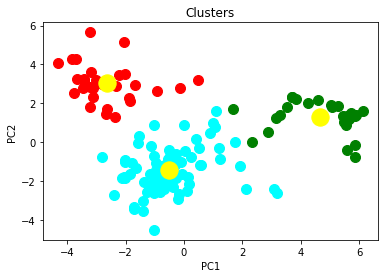

In [73]:
#plt.figure()
#plt.figure(figsize=(10,10))
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1,1], s=100, c='cyan', label='Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2,1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend()
#plt.savefig('clusters.jpg', dpi=500)
plt.show();

## Hierarchical cluster analysis


In [74]:
# Import dataset
Y = comb_df.iloc[:,1:].values

<Figure size 432x288 with 0 Axes>

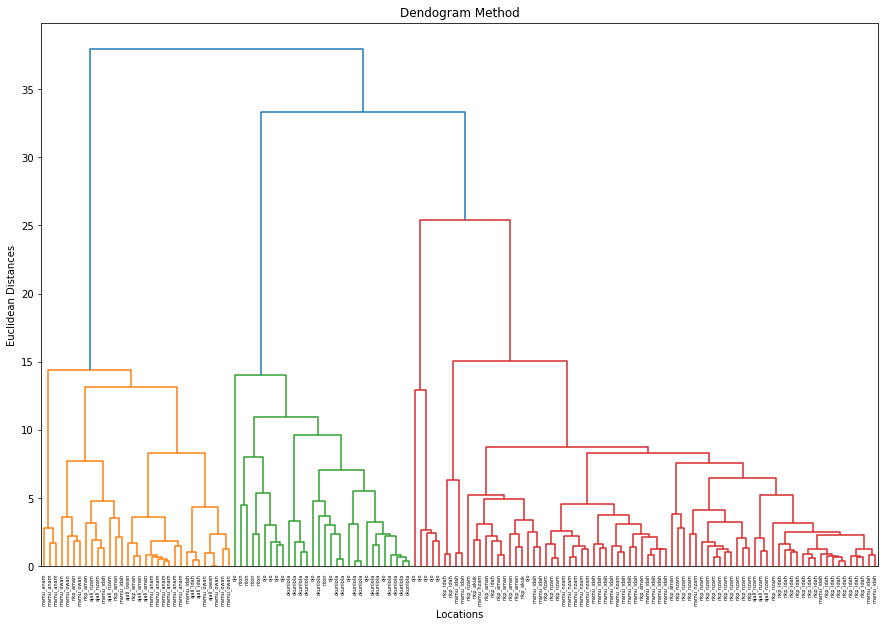

In [75]:
# Dendogram Method
plt.figure()
plt.figure(figsize=(15,10))
d_gram = sch.dendrogram(sch.linkage(df_scaled, method='ward'), labels=label)
plt.title('Dendogram Method')
plt.xlabel('Locations')
plt.ylabel('Euclidean Distances')
plt.savefig('hierachical cluster.jpg', dpi=500)
plt.show();

<Figure size 432x288 with 0 Axes>

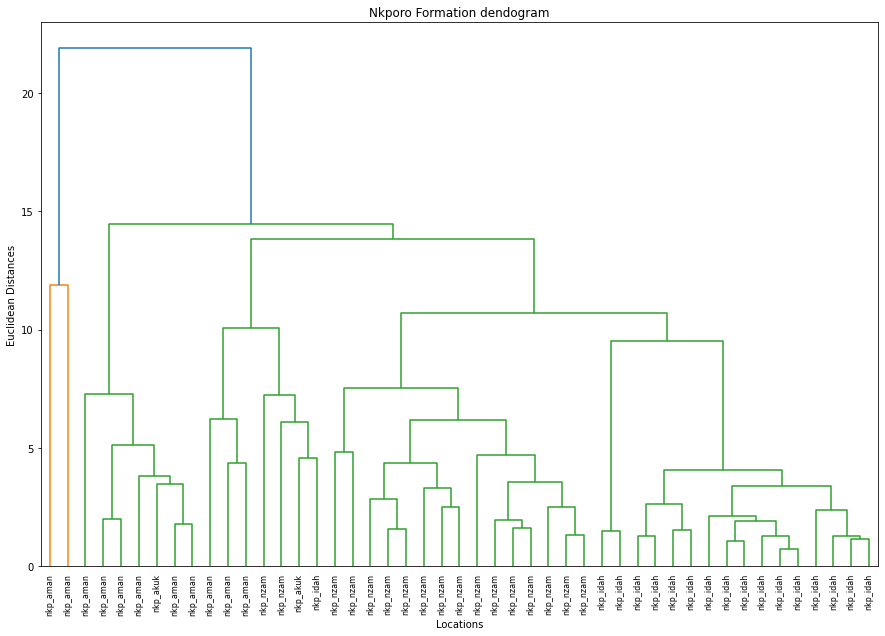

In [76]:
# Dendogram Method
plt.figure()
plt.figure(figsize=(15,10))
d_gram = sch.dendrogram(sch.linkage(df_scaled_nkp, method='ward'), labels=label_nkp)
plt.title('Nkporo Formation dendogram')
plt.xlabel('Locations')
plt.ylabel('Euclidean Distances')
plt.savefig('Nkporo Formation hierachical cluster.jpg', dpi=500)
plt.show();

<Figure size 432x288 with 0 Axes>

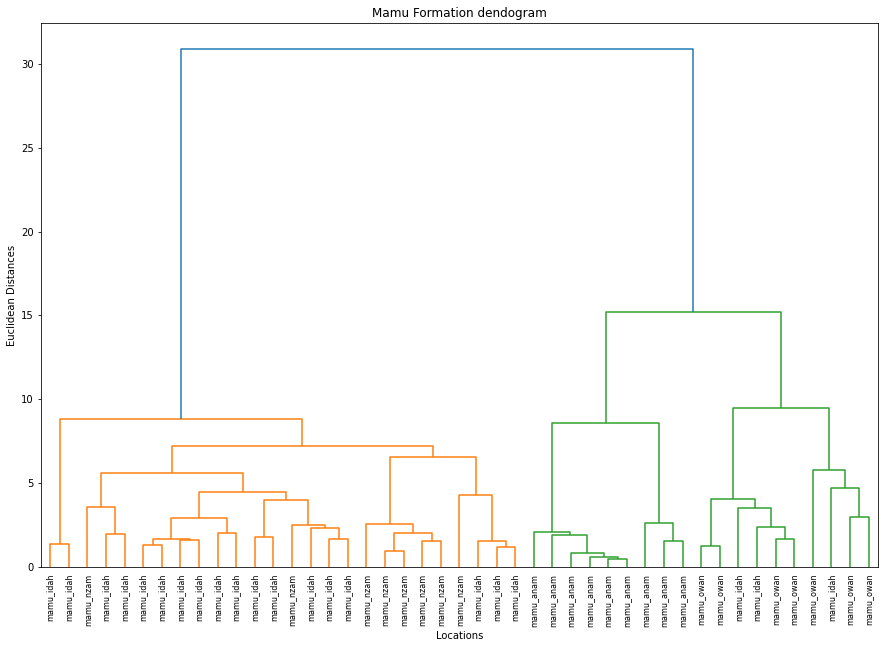

In [77]:
# Dendogram Method
plt.figure()
plt.figure(figsize=(15,10))
d_gram = sch.dendrogram(sch.linkage(df_scaled_ma, method='ward'), labels=label_ma)
plt.title('Mamu Formation dendogram')
plt.xlabel('Locations')
plt.ylabel('Euclidean Distances')
plt.savefig('Mamu Formation hierachical cluster.jpg', dpi=500)
plt.show();

<Figure size 432x288 with 0 Axes>

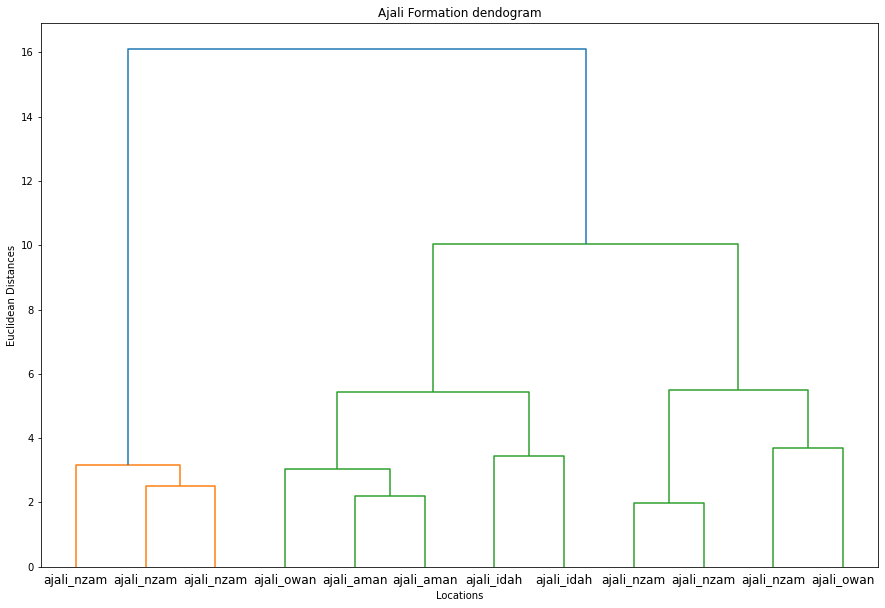

In [78]:
# Dendogram Method
plt.figure()
plt.figure(figsize=(15,10))
d_gram = sch.dendrogram(sch.linkage(df_scaled_aj, method='ward'), labels=label_aj)
plt.title('Ajali Formation dendogram')
plt.xlabel('Locations')
plt.ylabel('Euclidean Distances')
plt.savefig('Ajali Formation hierachical cluster.jpg', dpi=500)
plt.show();

<Figure size 432x288 with 0 Axes>

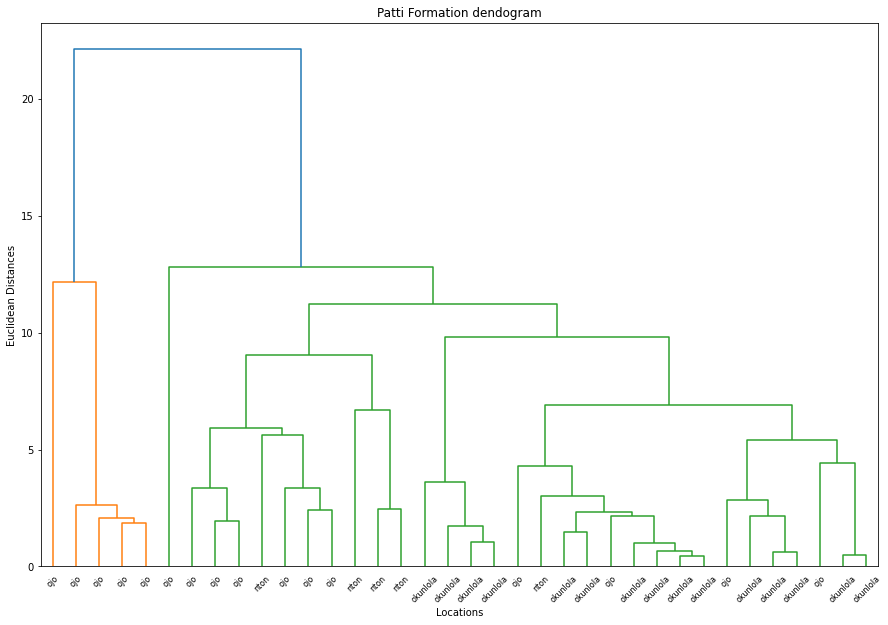

In [79]:
# Dendogram Method
plt.figure()
plt.figure(figsize=(15,10))
d_gram = sch.dendrogram(sch.linkage(df_scaled_pa, method='ward'), labels=label_pa)
plt.title('Patti Formation dendogram')
plt.xlabel('Locations')
plt.ylabel('Euclidean Distances')
plt.savefig('Patti Formation hierachical cluster.jpg', dpi=500)
plt.show();

In [80]:
# Fitting Hierarchical Cluster Analysis to dataset
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage='ward')
Y_hc = hc.fit_predict(X)

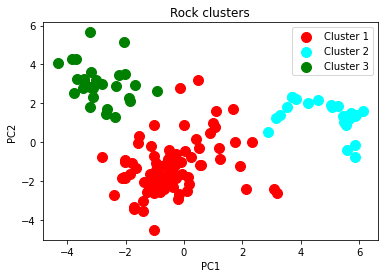

In [81]:
plt.scatter(X[Y_hc==0, 0], X[Y_hc==0, 1], s=100, c='red', label= 'Cluster 1')
plt.scatter(X[Y_hc==1, 0], X[Y_hc==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_hc==2, 0], X[Y_hc==2, 1], s=100, c='green', label= 'Cluster 3')
plt.title('Rock clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()